In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
df = pd.read_csv("data/generic_poll_lead.csv")
df.head()

,year,lead,in_power
0,2018,13.4,no
1,2016,1.2,yes
2,2014,3.0,yes
3,2012,1.5,no
4,2010,0.4,no


In [3]:
df.dtypes

year          int64
lead        float64
in_power     object
dtype: object

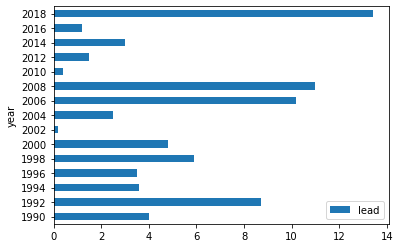

In [4]:
df.sort_values(by='year', ascending=True).plot(x='year', y='lead', kind='barh')

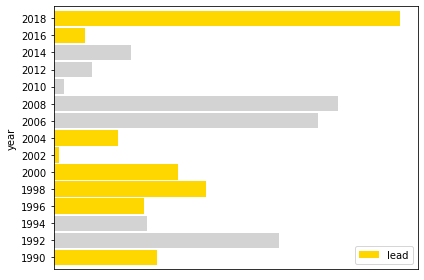

In [5]:
def build_colors(row):
    if row['in_power'] == 'no':
        return 'gold'
    else:
        return 'lightgrey'

colors = df.reset_index().apply(build_colors, axis=1)
ax = df.sort_values(by='year', ascending=True).plot(x='year', y='lead', kind='barh', width=0.9, color=colors)

ax.set_xticks([])

plt.tight_layout()
plt.savefig('NYT1.pdf')

In [22]:
df = pd.read_csv("data/cook_pvi.csv")
df.head()

,cook_pvi,pct_defeated
0,C+7 or greater,76
1,C+3 to C+7,63
2,C+1 to C+3,61
3,I+1 to C+1,35
4,I+1 to I+3,25


In [23]:
df['pct_survives'] = 100 - df.pct_defeated
df.head()

,cook_pvi,pct_defeated,pct_survives
0,C+7 or greater,76,24
1,C+3 to C+7,63,37
2,C+1 to C+3,61,39
3,I+1 to C+1,35,65
4,I+1 to I+3,25,75


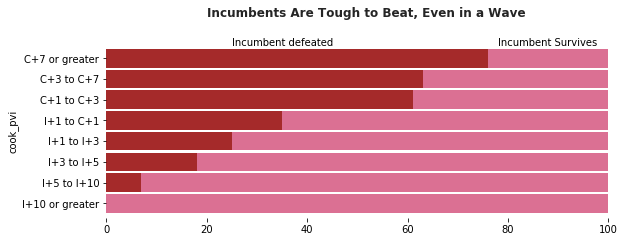

In [69]:
colors = ['brown', 'palevioletred']
df.sort_values(by='pct_defeated', ascending=True) \
.plot(x='cook_pvi', y=['pct_defeated', 'pct_survives'], kind='barh', stacked=True, figsize=(9, 3.5), width=0.9, color=colors, legend=None)

plt.text(x=20, y=9, s='Incumbents Are Tough to Beat, Even in a Wave', fontsize=12, weight='bold', alpha=.85)
plt.text(x=25, y=7.6, s='Incumbent defeated')
plt.text(x=78, y=7.6, s='Incumbent Survives')

plt.box(False)
plt.tight_layout()
plt.savefig('NYT2.pdf')

In [3]:
df = pd.read_csv("data/social-spending.csv")
df.head()

,Country,Social Spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%


In [4]:
df['Country2'] = df.Country.str.cat(df['Social Spending'], sep=' ')

In [5]:
df['spend'] = df['Social Spending'].str.extract(r'(.*)%').astype('float64')

In [6]:
df.spend.head()

0    31.5
1    30.8
2    29.0
3    28.9
4    28.7
Name: spend, dtype: float64

In [7]:
df = df.iloc[::-1]

In [8]:
def build_colors(row):
    if row['Country'] == 'Finland':
        return 'cornflowerblue'
    elif row['Country'] == 'Norway':
        return 'cornflowerblue'
    elif row['Country'] == 'Sweden':
        return 'cornflowerblue'
    elif row['Country'] == 'United States':
        return 'cornflowerblue'
    elif row['Country'] == 'O.E.C.D. avg.':
        return 'cornflowerblue'
    else:
        return 'lightsteelblue'

colors = df.reset_index().apply(build_colors, axis=1)

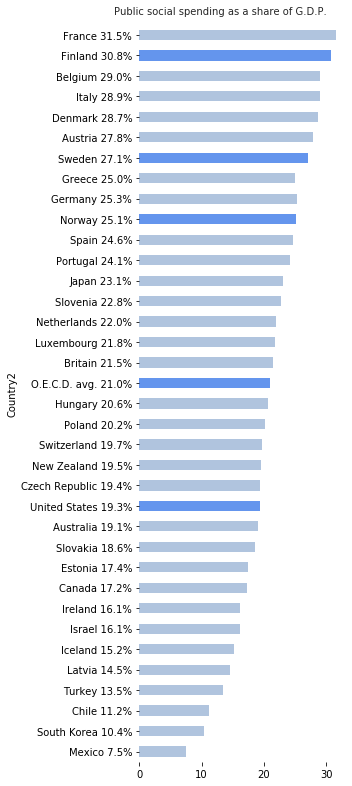

In [20]:
df.plot(x='Country2', y='spend',  kind='barh', figsize=(5,11), color=colors, legend=None)

plt.text(x=-4, y=36, s='Public social spending as a share of G.D.P.', fontsize=10, alpha=.85)

plt.tight_layout()
plt.box(False)
plt.savefig('NYT3.pdf')